# **Data analisys and prediction**

### Features:

| **Column** | **Description**                                           |
| ---------- | --------------------------------------------------------- |
| Survived   | person survived the titanic tragedy (0 - "NO", 1- "YES" ) |
| Sex        | the gender (female, male)                                 |
| Name       | the name                                                  |
| Age        | Age in years                                              |
| SibSp      | # of siblings/wife or husband on board                    |
| Parch      | # of parents / children on board                          |
| Pclass     | The ticket class (1 = "1st", 2 = "2nd", 3 = "3rd")        |

## Libraries to use:

In [85]:
# %pip install pandas numpy seaborn pathlib matplotlib sklearn

In [86]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt


In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.feature_selection import mutual_info_classif, SelectPercentile
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [88]:
file_path = Path("titanic.csv")
df_passengers = pd.read_csv(file_path)
df_passengers.head()

,Survived,Sex,Name,Age,SibSp,Parch,Pclass
0,1,male,"Anderson, Mr. Harry",48.0,0,0,1
1,1,female,"Andrews, Miss. Kornelia Theodosia",63.0,1,0,1
2,1,male,"Barkworth, Mr. Algernon Henry Wilson",80.0,0,0,1
3,0,male,"Baumann, Mr. John D",60.0,0,0,1
4,1,female,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,1,1,1


In [89]:
df_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  800 non-null    int64  
 1   Sex       800 non-null    object 
 2   Name      800 non-null    object 
 3   Age       800 non-null    float64
 4   SibSp     800 non-null    int64  
 5   Parch     800 non-null    int64  
 6   Pclass    800 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 43.9+ KB


## Exploratory data analysis (EDA)

### Single variable analysis

In [90]:
def show_pie_graph_of_a_variable(df_passengers, variable):
 grouping_by_variable=df_passengers.groupby([variable], observed=True)
 grouping_by_variable.size().plot.pie(y=variable,figsize=(5,5),autopct='%.2f%%')

In [91]:
def show_bar_chart_of_a_variable(df_passengers,variable):
 grouping_by_variable=df_passengers.groupby([variable], observed=True)
 grouping_by_variable.size().plot.bar(y=variable,figsize=(5,5))

- Variable: Age.

Will there be outliers in age?

<Axes: title={'center': "Box plot of the variable 'Age'"}>

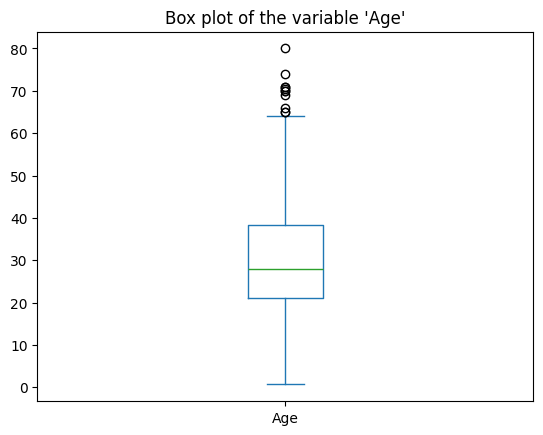

In [92]:
df_passengers["Age"].plot.box(title="Box plot of the variable 'Age'")

As seen in the graph, we see that the outliers are not erroneous data that cannot occur in reality.

And what will be the minimum age, it seems that it tends to zero?

In [93]:
df_passengers["Age"].min()

0.67

The minimum age is 0.67 years, that is, a baby of approximately 8 months.

- Variable: Sex/Gender.

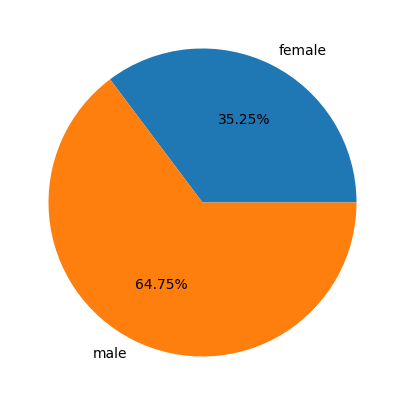

In [94]:
show_pie_graph_of_a_variable(df_passengers,"Sex")

As seen in the graph, there are more men than women, such that the number of women is approximately half the number of men. That is, there are twice as many men as women.

- Variable: Survivors

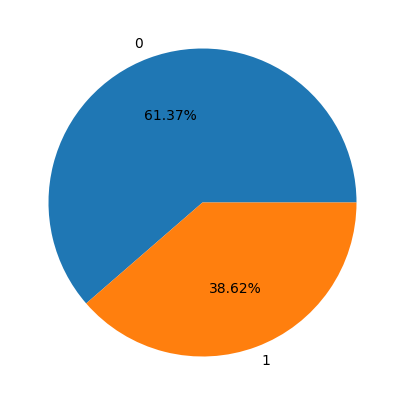

In [95]:
show_pie_graph_of_a_variable(df_passengers,"Survived")

The graph shows that there are a greater number of deaths than survivors, which is logical since very few people manage to survive a tragedy like the one that occurred with the Titanic.

- Variable: Class of the ticket

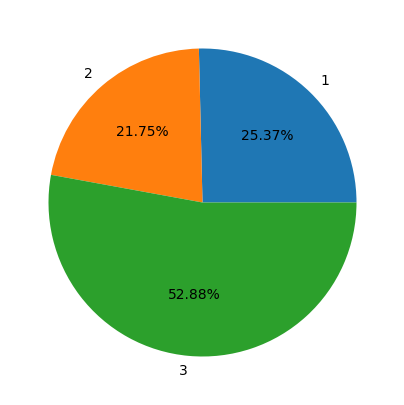

In [96]:
show_pie_graph_of_a_variable(df_passengers,"Pclass")

Looking at the graph, it stands out that there is a large number of passengers who were in third class, which is logical, because it is the most accessible.

- Variable: SibSp

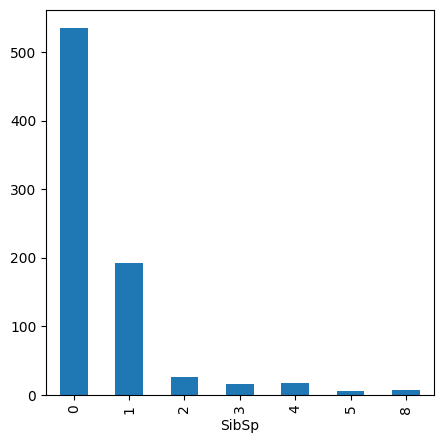

In [97]:
show_bar_chart_of_a_variable(df_passengers,"SibSp")

We observe a greater frequency of people traveling without the company of brothers or wifes

- Variable: Parch

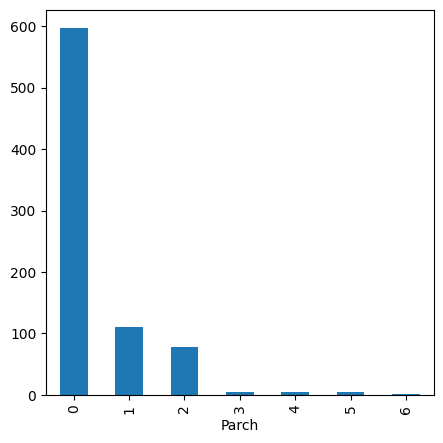

In [98]:
show_bar_chart_of_a_variable(df_passengers,"Parch")

We observe a greater frequency of people traveling without children or parents.

### Analysis of combined variables.

In [133]:
def show_stacked_bar_chart(df, variables):
 grouping_by_variables=pd.crosstab(df[variables[0]], df[variables[1]],normalize='index')*100
 ax = grouping_by_variables.plot.bar(stacked=True, rot=0)
 for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
  bar.get_height() / 2 + bar.get_y(),
  f"{round(bar.get_height(),2)}%", ha = 'center',
  color = 'w', weight = 'bold', size = 10)
 plt.show()

In [134]:
def show_stacked_bar_chart_without_overlap(df, variables):
 grouping_by_variables=pd.crosstab(df[variables[0]], df[variables[1]])
 grouping_by_variables.plot.bar(stacked=False,rot=0)

- Variables: type of ticket vs. survived

Will there be a relationship between the class of the passenger and whether or not the passenger survived?

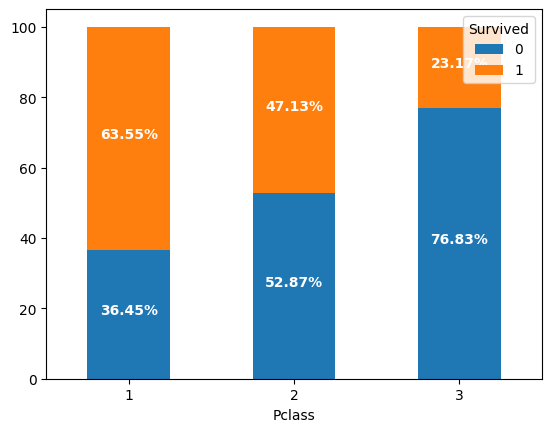

In [135]:
show_stacked_bar_chart(df_passengers,["Pclass","Survived"])

It is illustrated that more people in first class survived, while in third class there were many deaths. Passage class is related to survival.

- Variables: Survival vs age

<Axes: xlabel='Survived'>

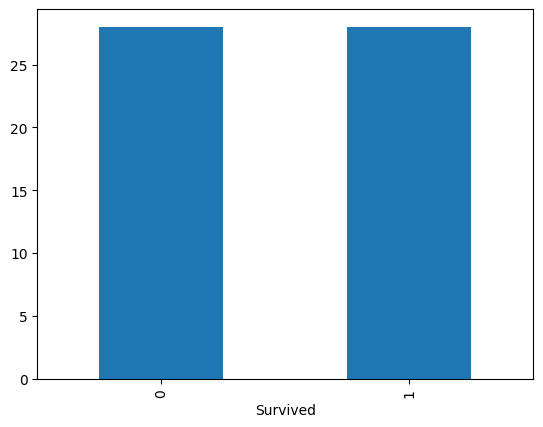

In [136]:
df_passengers.groupby(['Survived'])['Age'].median().plot(kind='bar')

<Axes: title={'center': 'Age'}, xlabel='Survived'>

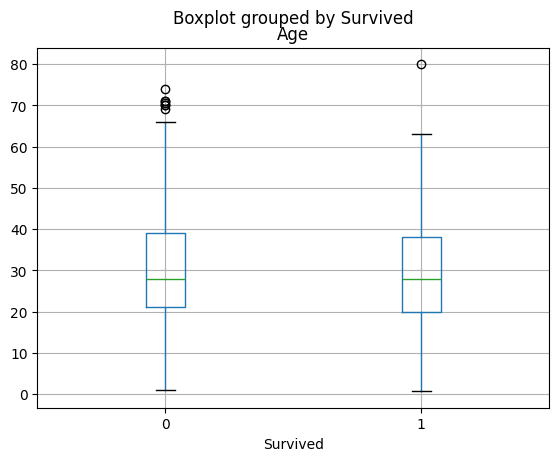

In [137]:
df_passengers.boxplot('Age','Survived')

We observed that people who survived have similar characteristics to those who did not survive. Furthermore, it is observed that the median ages are relatively the same. We conclude that there is no relationship between age and survival.